In [48]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [49]:
#import dataframe
currentpoints_df = pd.read_csv('api/data/resources/currentpoints.csv')
currentpoints_df

,id,second_name,first_name,minutes,value_season,value_form,form,total_points,points_per_game,team,...,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,position
0,254,Salah,Mohamed,1651,11.7,0.4,4.6,146,7.3,Liverpool,...,0,0,0,16,442,696.8,487.9,1001.0,218.5,MID
1,302,Borges Fernandes,Bruno Miguel,1745,12.7,0.3,3.0,145,6.9,Man Utd,...,4,0,0,22,522,783.0,876.2,728.0,238.9,MID
2,390,Son,Heung-Min,1706,14.6,0.5,4.8,143,7.2,Spurs,...,0,0,0,18,458,657.8,526.8,638.0,182.6,MID
3,388,Kane,Harry,1654,12.9,0.5,6.0,143,7.5,Spurs,...,1,0,0,26,512,763.4,371.2,792.0,192.4,FWD
4,202,Bamford,Patrick,1695,18.0,0.8,5.0,119,6.0,Leeds,...,1,0,0,16,388,508.0,160.2,934.0,160.1,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,257,Wilson,Harry,0,0.0,0.0,0.0,0,0.0,Liverpool,...,0,0,0,0,0,0.0,0.0,0.0,0.0,MID
646,2,Papastathopoulos,Sokratis,0,0.0,0.0,0.0,0,0.0,Arsenal,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF
647,242,Tsimikas,Konstantinos,0,0.0,0.0,0.0,0,0.0,Liverpool,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF
648,649,Bueno,Hugo,0,0.0,0.0,0.0,0,0.0,Wolves,...,0,0,0,0,0,0.0,0.0,0.0,0.0,DEF


In [50]:
currentpoints_df.sort_values('minutes', inplace = True, ascending = False)
currentpoints_df = currentpoints_df.reset_index(drop=True)
currentpoints_df

,id,second_name,first_name,minutes,value_season,value_form,form,total_points,points_per_game,team,...,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,position
0,325,Darlow,Karl,1890,14.8,0.5,2.3,74,3.5,Newcastle,...,2,0,77,6,397,594.0,0.0,0.0,59.5,GKP
1,449,Soucek,Tomas,1890,18.3,0.9,5.0,97,4.6,West Ham,...,3,0,0,13,333,503.2,110.6,590.0,120.4,MID
2,298,Maguire,Harry,1890,13.7,1.0,5.6,74,3.5,Man Utd,...,5,0,0,4,389,456.0,58.2,300.0,81.5,DEF
3,128,Guaita,Vicente,1890,15.0,1.1,5.4,72,3.4,Crystal Palace,...,2,0,65,10,366,474.8,0.0,0.0,47.4,GKP
4,239,Justin,James,1890,15.4,0.7,3.4,77,3.7,Leicester,...,4,0,0,7,381,391.4,286.7,160.0,84.0,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,586,Butland,Jack,0,0.0,0.0,0.0,0,0.0,Crystal Palace,...,0,0,0,0,0,0.0,0.0,0.0,0.0,GKP
646,641,Mateta,Jean-Philippe,0,0.0,0.0,0.0,0,0.0,Crystal Palace,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FWD
647,151,Lössl,Jonas,0,0.0,0.0,0.0,0,0.0,Everton,...,0,0,0,0,0,0.0,0.0,0.0,0.0,GKP
648,161,Gbamin,Jean-Philippe,0,0.0,0.0,0.0,0,0.0,Everton,...,0,0,0,0,0,0.0,0.0,0.0,0.0,MID


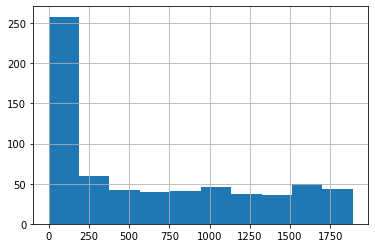

In [51]:
#breakdown of players by playing time
currentpoints_df['minutes'].hist()

In [52]:
#remove players who have played less than 250min this season
currentpoints_df = currentpoints_df[currentpoints_df.minutes >250]

(369, 35)


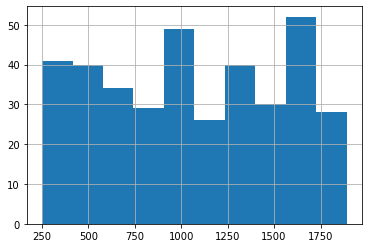

In [54]:
currentpoints_df['minutes'].hist()
print(currentpoints_df.shape)

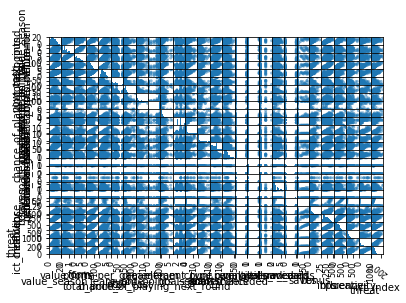

<Figure size 432x288 with 0 Axes>

In [75]:
#check for patterns on scatter matrix
scatter_matrix(currentpoints_df[['value_season','value_form','form',
                                 'total_points','points_per_game','team',
                                 'team_code','now_cost',
                                 'event_points','chance_of_playing_next_round',
                                'dreamteam_count','element_type','goals_scored',
                                 'assists','clean_sheets','goals_conceded',
                                 'own_goals','penalties_saved', 'penalties_missed',
                                 'yellow_cards','red_cards','saves','bonus','bps',
                                 'influence','creativity','threat','ict_index']])
plt.xticks(rotation=140)
plt.yticks(rotation=140)
plt.show()
#save image
plt.savefig('relationships.png', dpi =300)

In [74]:
#save image
plt.savefig('relationships.png', dpi =600)

<Figure size 432x288 with 0 Axes>